In [1]:
from pathlib import Path
from nilearn.plotting import plot_surf, view_surf
from nilearn import datasets

output_path = Path("/data/parietal/store/data/HCP900/glm/fsaverage5/")

In [2]:
# Fetch the fsaverage5 surface
fsaverage5 = datasets.fetch_surf_fsaverage(mesh="fsaverage5")

In [3]:
# plot data
from nibabel import load
sub = '996782'
interest = {
    'LANGUAGE': ['MATH-STORY'],
    'WM': ['2BK-0BK', 'BODY-AVG', 'PLACE-AVG', 'TOOL-AVG', 'FACE-AVG'],
    'EMOTION': ['SHAPES-FACES'],
    'SOCIAL': ['TOM-RANDOM'],
    'RELATIONAL': ['REL-MATCH'],
    'GAMBLING': ['PUNISH-REWARD'],
    'MOTOR': ['RH-AVG', 'RF-AVG', 'T-AVG', 'LH-AVG', 'LF-AVG']
}
hemi = 'left'
for task in list(interest.keys())[:1]:
    for contrast in interest[task]:
        img =  output_path / sub / task / "level2" / "z_maps" / f"z_{contrast}_{hemi[0]}h.gii"
        data = load(img).agg_data()
        view_surf(
            fsaverage5[f'pial_{hemi}'],
            data,
            fsaverage5[f'sulc_{hemi}'],
            # hemi=hemi,
            # view='lateral',
            # engine='matplotlib',
            threshold=2.3, title=contrast)

In [4]:
# compute an average of the activation maps
import glob
subjects = sorted(glob.glob(str(output_path / '*')))
training_subjects = subjects[:20]                  

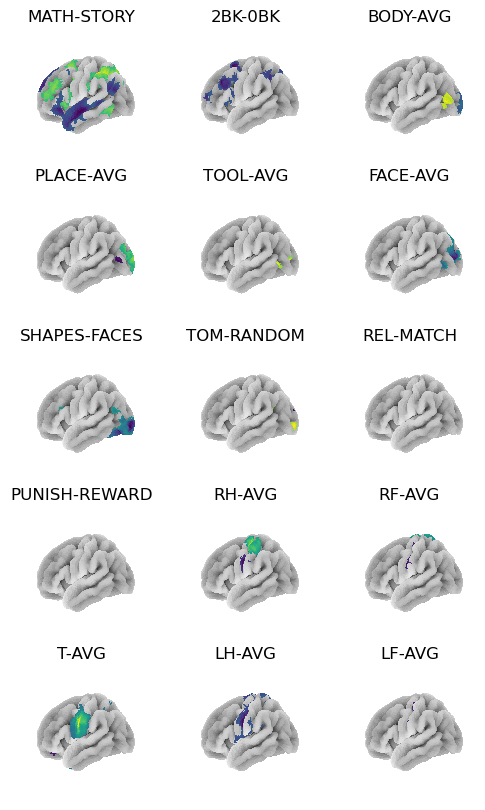

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 10))
q = 0
template = {}
# fig, axs = plt.subplots(3, 3, projection='3d')
for task in list(interest.keys()):
    for contrast in interest[task]:
        imgs = [output_path / subject / task / "level2" / "z_maps" /\
                f"z_{contrast}_{hemi[0]}h.gii" for subject in training_subjects]
        data = np.mean([load(img).agg_data() for img in imgs], 0)
        template[contrast] = data
        q += 1
        ax = fig.add_subplot(5, 3, q, projection='3d')
        plot_surf(
            fsaverage5[f'pial_{hemi}'],
            data,
            fsaverage5[f'sulc_{hemi}'],
            hemi=hemi,
            view='lateral',
            engine='matplotlib',
            threshold=3.0,
            # title=contrast,
            axes=ax
        )
        ax.set_title(contrast)

In [ ]:
view_surf?